In [81]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from seaborn import boxplot, displot, countplot

## Exercise 1

In [5]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Description of the dataset:**
- PassengerId: an integer (unique for each passenger)
- Survived: an integer, either 0 (died) or 1 (survived)
- Pclass: an integer between 1 and 3
- Name: a String 
- Sexe: {male, female}
- Age: a float with precision 0.1
- SibSp:an integer
- Parch: an integer
- Ticket: a string
- Fare: a float with precision 0.0001
- Cabin: a string
- Embarked: a character

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [41]:
total_N = 891
d_missing = {}

for column in data.columns:
    d_missing[column] = round(100*(1-data[column].count()/total_N), 2)

sorted(d_missing.items(), key=lambda c:c[1], reverse=True)

[('Cabin', 77.1),
 ('Age', 19.87),
 ('Embarked', 0.22),
 ('PassengerId', 0.0),
 ('Survived', 0.0),
 ('Pclass', 0.0),
 ('Name', 0.0),
 ('Sex', 0.0),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Ticket', 0.0),
 ('Fare', 0.0)]

In [44]:
data = data.drop(columns=["PassengerId", "Ticket", "Name"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [57]:
women = data[data["Sex"]=="female"]
men = data[data["Sex"]=="male"]

print(women)
print(men)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
8           1       3  female  27.0      0      2  11.1333   NaN        S
9           1       2  female  14.0      1      0  30.0708   NaN        C
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
880         1       2  female  25.0      0      1  26.0000   NaN        S
882         0       3  female  22.0      0      0  10.5167   NaN        S
885         0       3  female  39.0      0      5  29.1250   NaN        Q
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S

[314 rows x 9 columns]
     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0   

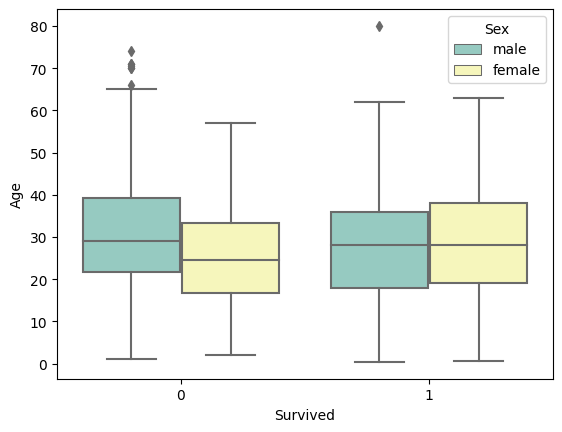

In [56]:
fig, ax = plt.subplots(1, 1)
ax = sns.boxplot(x="Survived", y="Age",hue="Sex", data=data, palette="Set3")

/tmp/ipykernel_411/1405107655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(women[women["Survived"]==True].Age, bins=15, kde=False, label="survived", ax = ax[0])
/tmp/ipykernel_411/1405107655.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(women[women["Survived"]==False].Age, bins=15, 

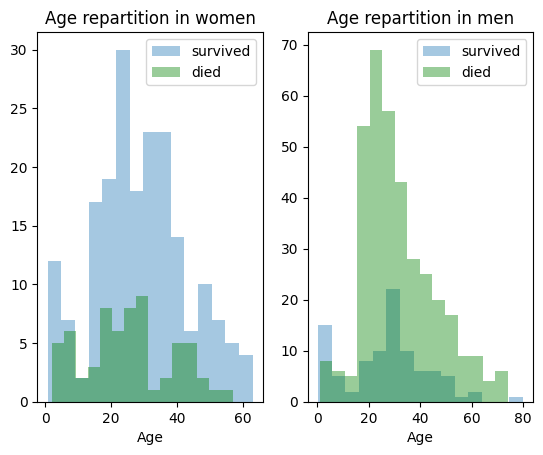

In [127]:
fig, ax = plt.subplots(1,2)

sns.distplot(women[women["Survived"]==True].Age, bins=15, kde=False, label="survived", ax = ax[0])
sns.distplot(women[women["Survived"]==False].Age, bins=15, kde=False, color="green", label="died", ax=ax[0])
ax[0].legend(loc="best")
ax[0].set_title("Age repartition in women")

sns.distplot(men[men["Survived"]==True].Age, bins=15, kde=False, label="survived", ax = ax[1])
sns.distplot(men[men["Survived"]==False].Age, bins=15, kde=False, color="green", label="died", ax = ax[1])
ax[1].legend(loc="best")
ax[1].set_title("Age repartition in men")

plt.show()

### Link between "Embarked" and "Survival"

/tmp/ipykernel_411/633898819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


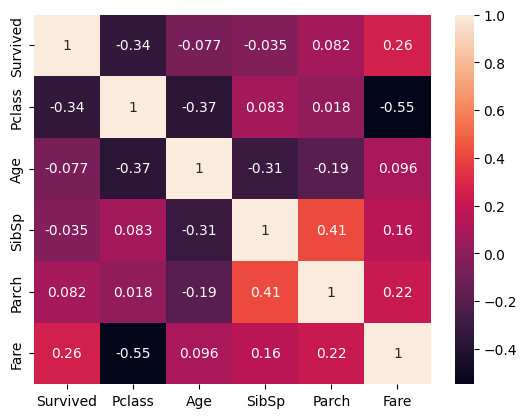

In [129]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

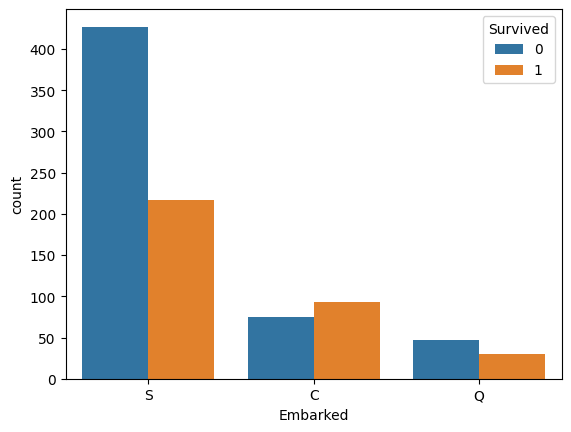

In [100]:
from seaborn import countplot
sns.countplot(data=data, x="Embarked", hue="Survived")

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

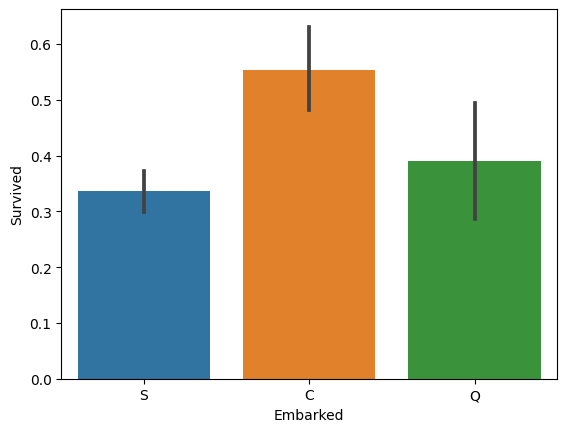

In [120]:
sns.barplot(data=data, x="Embarked", y="Survived")

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

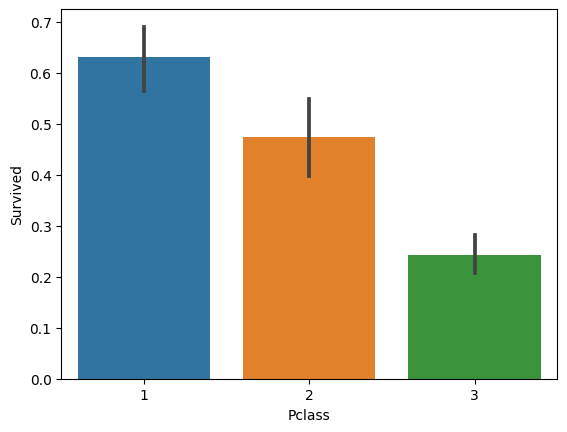

In [122]:
sns.barplot(data=data, x="Pclass", y="Survived")

## Exercise 2

In [131]:
data = pd.read_csv("middle_tn_schools.csv")
data.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 347 non-null    object 
 1   school_rating        347 non-null    float64
 2   size                 347 non-null    float64
 3   reduced_lunch        347 non-null    float64
 4   state_percentile_16  347 non-null    float64
 5   state_percentile_15  341 non-null    float64
 6   stu_teach_ratio      347 non-null    float64
 7   school_type          347 non-null    object 
 8   avg_score_15         341 non-null    float64
 9   avg_score_16         347 non-null    float64
 10  full_time_teachers   347 non-null    float64
 11  percent_black        347 non-null    float64
 12  percent_white        347 non-null    float64
 13  percent_asian        347 non-null    float64
 14  percent_hispanic     347 non-null    float64
dtypes: float64(13), object(2)
memory usage: 

In [133]:
data.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


/tmp/ipykernel_411/114968602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().round(2)


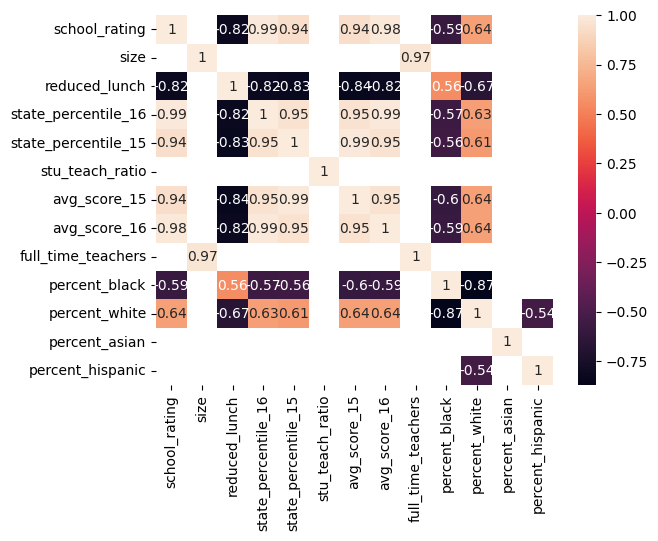

In [140]:
corr_matrix = data.corr().round(2)
corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]
sns.heatmap(corr_matrix, annot=True)
plt.show()